In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [63]:
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### 1. Exploratory Data Analysis

1. What is the distribution of how many articles a user interacts with in the dataset?

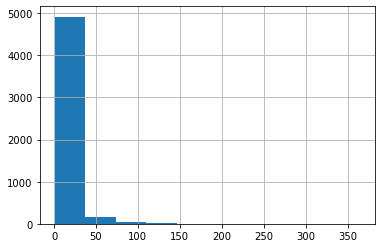

In [64]:
count_articles = df.groupby("email")["article_id"].count().sort_values(ascending=False)
count_articles.hist()

In [65]:
count_articles.median()

3.0

In [66]:
count_articles.max()

364

In [67]:
df_content.duplicated(subset='article_id').sum()

5

In [68]:
df_content.drop_duplicates(keep='first',subset='article_id')

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4
...,...,...,...,...,...
1051,PouchDB-find is a new API and syntax that allo...,PouchDB uses MapReduce as its default search m...,A look under the covers of PouchDB-find,Live,1046
1052,We compare discriminative and generative learn...,We compare discriminative and generative learn...,A comparison of logistic regression and naive ...,Live,1047
1053,"Essays about data, building products and boots...",In order to demystify some of the magic behind...,What I Learned Implementing a Classifier from ...,Live,1048
1054,NaN,Learn how to use IBM dashDB as data store for ...,Use dashDB with Spark,Live,1049


#### In the cells below We will find ;

- a. The number of unique articles that have an interaction with a user.
- b. The number of unique articles in the dataset (whether they have any interactions or not).
- c. The number of unique users in the dataset. (excluding null values)
- d. The number of user-article interactions in the dataset.

In [69]:
df["article_id"].nunique()

714

In [70]:
df_content["article_id"].nunique()

1051

In [71]:
df.email.nunique()

5148

In [72]:
df.shape[0]

45993

In [73]:
unique_articles = 714 # The number of unique articles that have at least one interaction
total_articles = 1051 # The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993 # The number of user-article interactions

#### What is the most popular article ?

In [74]:
df.groupby("article_id")["email"].count().sort_values(ascending = False).reset_index().loc[0]

article_id    1429.0
email          937.0
Name: 0, dtype: float64

Most_viewed article id = **1429**

### We will convert email adress to integer number with the code below

In [75]:
def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [76]:
df["user_id"].value_counts().sort_values(ascending = False)

23      364
3782    363
98      170
3764    169
203     160
       ... 
3348      1
1205      1
3220      1
3156      1
2049      1
Name: user_id, Length: 5149, dtype: int64

### 2. Rank-Based Recommendations

In [77]:
def get_top_articles(n,df=df):
    top_articles = df.groupby("article_id")["user_id"].count().sort_values(ascending=False).reset_index()["article_id"].values[:n]
    top_articles = df[df["article_id"].isin(top_articles)]['title'].unique()
    return top_articles

In [78]:
def get_top_article_ids(n, df=df):
    top_articles = df.groupby('article_id').count()['user_id'].sort_values(ascending=False).reset_index()['article_id'].values[:n]
    top_articles = df[df['article_id'].isin(top_articles)]['article_id'].unique()
    return top_articles
 
    return top_articles

In [79]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['healthcare python streaming application demo'
 'use deep learning for image classification'
 'apache spark lab, part 1: basic concepts'
 'predicting churn with the spss random tree algorithm'
 'analyze energy consumption in buildings'
 'visualize car data with brunel'
 'use xgboost, scikit-learn & ibm watson machine learning apis'
 'gosales transactions for logistic regression model'
 'insights from new york car accident reports'
 'finding optimal locations of new store using decision optimization']
[1314. 1429. 1170. 1364. 1162. 1431. 1427. 1304. 1330. 1293.]


In [80]:
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

In [104]:
top_5

array(['use deep learning for image classification',
       'predicting churn with the spss random tree algorithm',
       'visualize car data with brunel',
       'use xgboost, scikit-learn & ibm watson machine learning apis',
       'insights from new york car accident reports'], dtype=object)

In [105]:
top_10

array(['healthcare python streaming application demo',
       'use deep learning for image classification',
       'apache spark lab, part 1: basic concepts',
       'predicting churn with the spss random tree algorithm',
       'analyze energy consumption in buildings',
       'visualize car data with brunel',
       'use xgboost, scikit-learn & ibm watson machine learning apis',
       'gosales transactions for logistic regression model',
       'insights from new york car accident reports',
       'finding optimal locations of new store using decision optimization'],
      dtype=object)

In [106]:
top_20

array(['healthcare python streaming application demo',
       'use deep learning for image classification',
       'classify tumors with machine learning',
       'apache spark lab, part 1: basic concepts',
       'the nurse assignment problem',
       'predicting churn with the spss random tree algorithm',
       'analyze energy consumption in buildings',
       'visualize car data with brunel',
       'use xgboost, scikit-learn & ibm watson machine learning apis',
       'putting a human face on machine learning',
       'gosales transactions for logistic regression model',
       'welcome to pixiedust',
       'insights from new york car accident reports',
       'model bike sharing data with spss',
       'finding optimal locations of new store using decision optimization',
       'analyze accident reports on amazon emr spark',
       'deep learning with tensorflow course by big data university',
       'total population by country',
       'movie recommender system with spark mach

### 3. User-User Based Collaborative Filtering

- For user - user based collabortive filtering , We will crease an user-item matrix.

- Each row represents an unique user and each column represents unique article.

- If user interacts with article We will place a 1 , it does not matter how many times a user interacted  with the article ,all entries where a user has interacted with an article should be a 1

In [107]:
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    user_item = df.groupby(['user_id', 'article_id'])['user_id'].nunique().unstack().fillna(0)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [108]:
user_item

article_id,0.0,2.0,4.0,8.0,9.0,12.0,14.0,15.0,16.0,18.0,...,1434.0,1435.0,1436.0,1437.0,1439.0,1440.0,1441.0,1442.0,1443.0,1444.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- We can also test manually using n_unique.

In [109]:
df.user_id.nunique()

5149

In [110]:
df.article_id.nunique()

714

In [111]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    no_of_users = user_item.shape[0]
    provided_user = user_item.loc[user_id].values
    
    similar_users = {}
    for i in range(1, no_of_users + 1):
        other_user = user_item.loc[i].values
        dist = np.dot(provided_user, other_user)
        similar_users[i] = dist

    # sort by similarity
    sorted_dict = sorted(similar_users.items(), key=lambda x: x[1], reverse=True)
    
    most_similar_users = list(map(lambda x: x[0], sorted_dict))
    
    # remove the own user's id
    most_similar_users.remove(user_id)   
    return most_similar_users # return a list of the users in order from most to least similar

In [112]:
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 49]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 23, 3782]


In [113]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = list(df[df['article_id'].isin(article_ids)]['title'].unique().astype(str))
    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    article_ids = list(user_item.loc[user_id][user_item.loc[user_id] == 1].index.astype(str))
    
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    similar_users = find_similar_users(user_id)
    recs = []
    articles_seen_ids, articles_seen_names = get_user_articles(user_id)
    for user in similar_users:
        articles_seen_ids_other, articles_seen_names_other = get_user_articles(user)

        new_recs = np.setdiff1d(articles_seen_ids_other, articles_seen_ids, assume_unique=True)
        
        # Update recs with new recs
        recs = np.unique(np.concatenate([new_recs, recs], axis=0))
        
        # If we have enough recommendations exit the loop
        if len(recs) > m-1:
            recs = recs[:m]
            break
    return recs # return your recommendations for this user_id    

In [114]:
get_article_names(user_user_recs(1, 10))

['analyze energy consumption in buildings',
 'analyze accident reports on amazon emr spark',
 '520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
 '1448    i ranked every intro to data science course on...\nName: title, dtype: object',
 'data tidying in data science experience',
 'airbnb data for analytics: vancouver listings',
 'recommender systems: approaches & algorithms',
 'airbnb data for analytics: mallorca reviews',
 'analyze facebook data using ibm watson and watson studio',
 'a tensorflow regression model to predict house values']

In [115]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    
    #get df of similar users and df of user-article interactions
    similar_users = user_item.dot(user_item[user_item.index == 1].T)

    #sort user and remove most similar user because it will be the same as input user_id
    similar_users = similar_users.sort_values(similar_users.columns[0], ascending=False)[1:]
    user_interactions  = df.groupby('user_id', sort=False).count()
    
    
    # merge similar users and user-interactions df's and format them for easy use
    neighbors_df = pd.merge(similar_users, user_interactions, how='left', left_index=True, right_index=True)
    neighbors_df = neighbors_df.drop('title', axis=1).reset_index()
    neighbors_df.columns = ['neighbor_id', 'similarity','interactions']
    neighbors_df = neighbors_df.sort_values(['similarity','interactions'],ascending=False).reset_index()
    
    return neighbors_df # Return the dataframe specified in the doc_string

In [116]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    #get df of similar users and df of user-article interactions
    similar_users = user_item.dot(user_item[user_item.index == 1].T)
    
    #sort user and remove most similar user because it will be the same as input user_id
    similar_users = similar_users.sort_values(similar_users.columns[0], ascending=False)[1:]
    user_interactions  = df.groupby('user_id', sort=False).count()
    
    # merge similar users and user-interactions df's and format them for easy use
    neighbors_df = pd.merge(similar_users, user_interactions, how='left', left_index=True, right_index=True)
    neighbors_df = neighbors_df.drop('title', axis=1).reset_index()
    neighbors_df.columns = ['neighbor_id', 'similarity','interactions']
    neighbors_df = neighbors_df.sort_values(['similarity','interactions'],ascending=False).reset_index()
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    recs = []
    neighbors_df = get_top_sorted_users(user_id)
    neighbor_user_ids = neighbors_df['neighbor_id'].values
    articles_seen_ids, articles_seen_names = get_user_articles(user_id)
    
    for neighbor_id in neighbor_user_ids:
        articles_seen_ids_other, articles_seen_names_other = get_user_articles(neighbor_id)
        
        articles_interactions_tuple = list(map(lambda x: (x, user_item[float(x)].sum()), articles_seen_ids_other))        
        
        articles_interactions_tuple = sorted(articles_interactions_tuple, key=lambda x: x[1], reverse=True)
        
        neighbor_articles = list(map(lambda x: x[1], articles_interactions_tuple))
        
        new_recs = np.setdiff1d(articles_seen_ids_other, articles_seen_ids, assume_unique=True)
        
        # Update recs with new recs
        recs = np.unique(np.concatenate([new_recs, recs], axis=0))
        
        # If we have enough recommendations exit the loop
        if len(recs) > m-1:
            recs = recs[:m]
            break
    # Your code here
    rec_names = get_article_names(recs)
    return recs, rec_names

### Testing Recommender System

### Let's check recommended articles for user 100

In [125]:
user_user_recs_part2(100,10)

(array(['1052.0', '109.0', '1170.0', '1183.0', '1185.0', '1232.0',
        '1293.0', '1305.0', '1363.0', '1368.0'], dtype='<U32'),
 ['classify tumors with machine learning',
  'apache spark lab, part 1: basic concepts',
  'access db2 warehouse on cloud and db2 with python',
  'putting a human face on machine learning',
  'gosales transactions for naive bayes model',
  'finding optimal locations of new store using decision optimization',
  'tensorflow quick tips',
  'country statistics: life expectancy at birth',
  'categorize urban density',
  'predict loan applicant behavior with tensorflow neural networking'])

## Matrix Factorizaton

In [126]:
# Perform SVD on the User-Item Matrix Here

In [127]:
u,s,vt = np.linalg.svd(user_item)

In [128]:
num_latent_feats = np.arange(10,700+10,20)

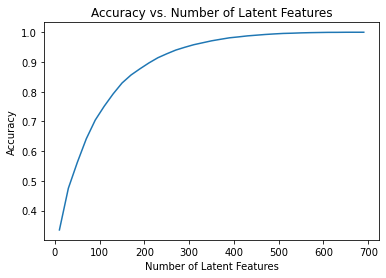

In [131]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

In [132]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    test_idx = np.array(user_item_test.index.unique())
    test_arts = np.array(user_item_test.columns.unique())
    # Your code here
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [143]:
user_item_test.shape

(682, 574)

In [144]:
len(test_idx) - len(set(user_item_test.index.unique()) - set(user_item_train.index.unique()))

20

In [145]:
len(set(user_item_test.index.unique()) - set(user_item_train.index.unique()))

662

In [146]:
len(set(user_item_test.columns.unique()) - set(user_item_train.columns.unique()))

0

In [148]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many movies can we make predictions for in the test set?': b,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d# letter here
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


In [149]:
u_train, s_train, vt_train = np.linalg.svd(user_item_train)

In [150]:
user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

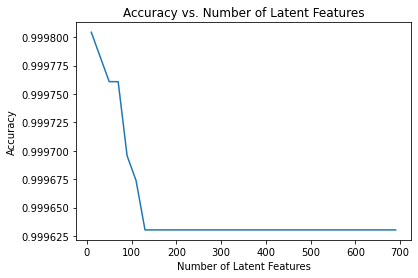

In [151]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    err = []
    for idx in range(len(test_idx)):
        try:
            user_id = test_idx[idx]
            article_id = test_arts[idx]
            user_ids_series = np.array(user_item_test.index)
            movie_ids_series = np.array(user_item_test.columns)

        # User row and Movie Column
            user_row = np.where(user_ids_series == user_id)[0][0]
            movie_col = np.where(movie_ids_series == article_id)[0][0]


            user_item_est = np.around(np.dot(np.dot(u_new[user_row, :], s_new), vt_new[:, movie_col]))
            err.append(np.subtract(user_item_test.iloc[user_row, movie_col], user_item_est))
        except:
            continue
    # take dot product
#    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
#    diffs = np.subtract(user_item_train, user_item_est)
    
    # total errors and keep track of them
#    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(np.sum(np.abs(err)))
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');